In [3]:



import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("Lead Scoring.csv")



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.drop(['Prospect ID' , 'Lead Number'] , axis=1 , inplace=True)

In [5]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


<h4>Checking of Duplicates</h4>

In [6]:
df.duplicated().value_counts()

False    7959
True     1281
Name: count, dtype: int64

<h4>Checking of Missing Values</h4>

In [7]:
df.isna().sum()[:18]

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
dtype: int64

In [8]:
df.isna().sum()[18:]

Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Tags                                        3353
Lead Quality                                4767
Update me on Supply Chain Content              0
Get updates on DM Content                      0
Lead Profile                                2709
City                                        1420
Asymmetrique Activity Index                 4218
Asymmetrique Profile Index                  4218
Asymmetrique Activity Score                 4218
Asymmetrique Profile Score                  4218
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Last Notable Activity                          0
dtype: int64

<h4>Understanding the numerical columns</h4>

In [9]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<h4>Understanding Lead Origin</h4>

In [10]:
df["Lead Origin"].isna().sum()

np.int64(0)

In [11]:
df["Lead Origin"].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Note Lead origin is having Quick add form as just 1 , That means in future we might have something added to it and should be ready to handle. Dont consider one hot encoding here.

No textual inconsistencies detected

In [12]:
def missing_and_value_counts(df , s):

    print("====================================================\n")
 
    print(s)

    print(f"\nThe number of missing values are : {df[s].isna().sum()}\n")
    print(f"The output of value_counts\n {df[s].value_counts()}")

    


In [13]:
missing_and_value_counts(df,"Lead Origin")


Lead Origin

The number of missing values are : 0

The output of value_counts
 Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


In [14]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
for i in df.columns:
    missing_and_value_counts(df,i)


Lead Origin

The number of missing values are : 0

The output of value_counts
 Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Lead Source

The number of missing values are : 36

The output of value_counts
 Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

Do Not Email

The number of missing values are : 0

The 

<ul>
    <li>We can observe most of the respondents are from India</li>
    <li>In form based Questions we are seeing "Select" , Must be some Data issue</li>

</ul>

In [16]:
def plot_numerical_distributions(df):
    """
    Plots a boxplot and a histogram with KDE for each numerical column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing numerical columns.
    """
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numerical_cols:
        plt.figure(figsize=(14, 5))
        
        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        
        # Histogram with KDE
        plt.subplot(1, 2, 2)
        sns.histplot(df[col], kde=True, color='salmon', bins=30)
        plt.title(f'Histogram & KDE of {col}')
        
        plt.tight_layout()
        plt.show()

<h4>Box and Histograms for the Numerical columns</h4>

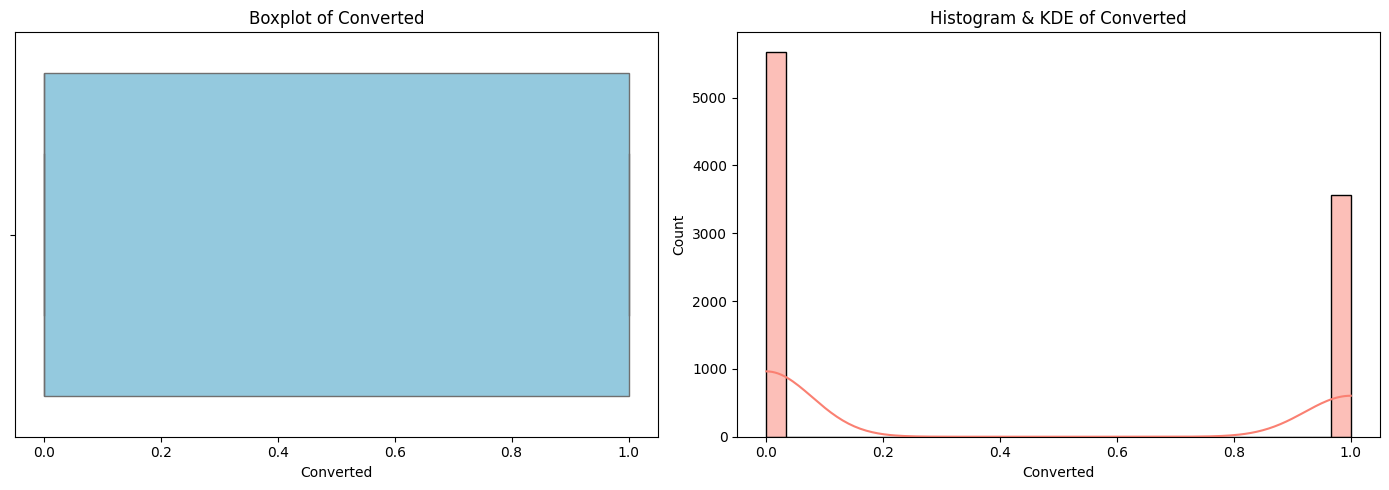

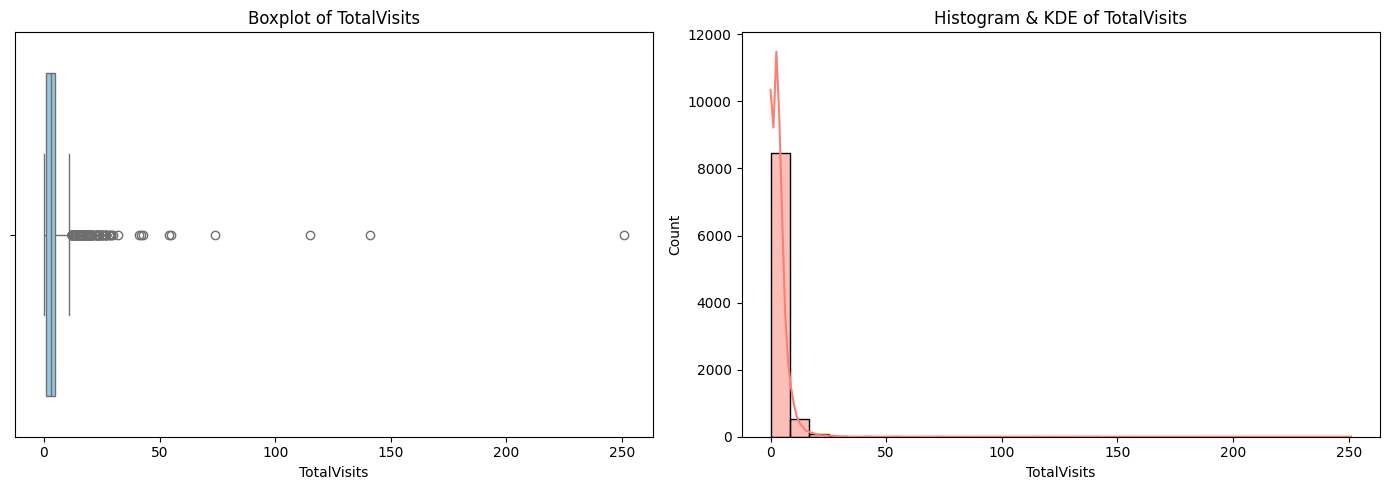

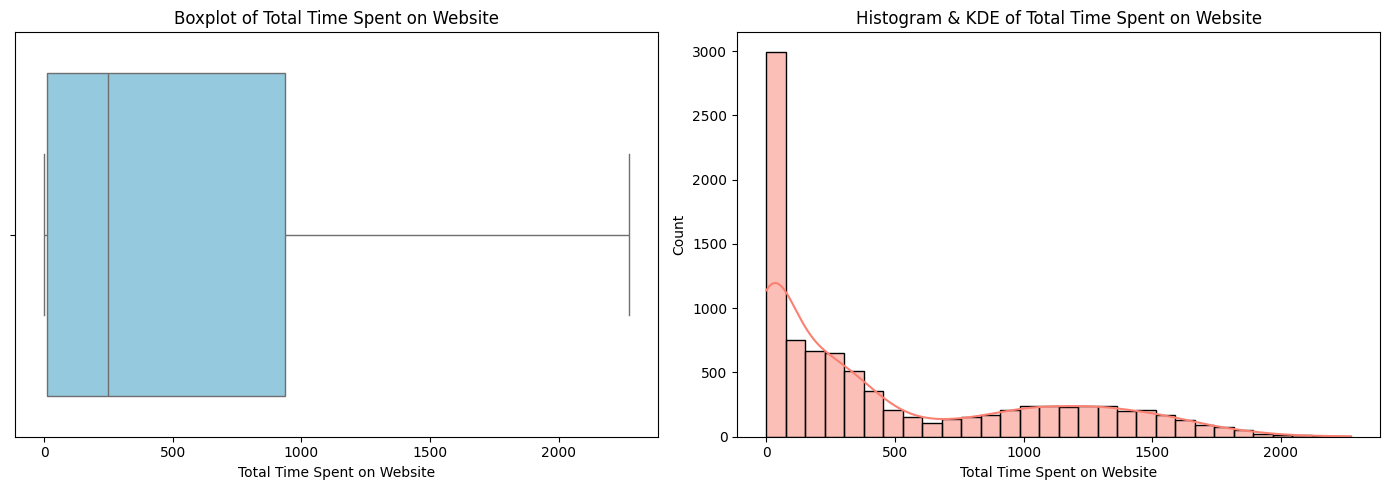

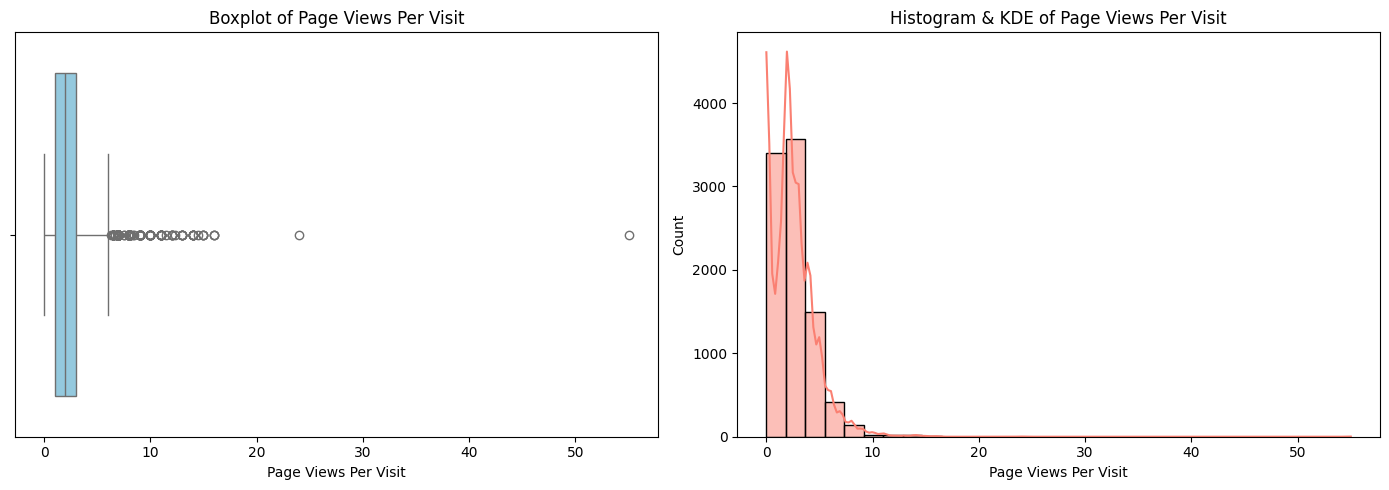

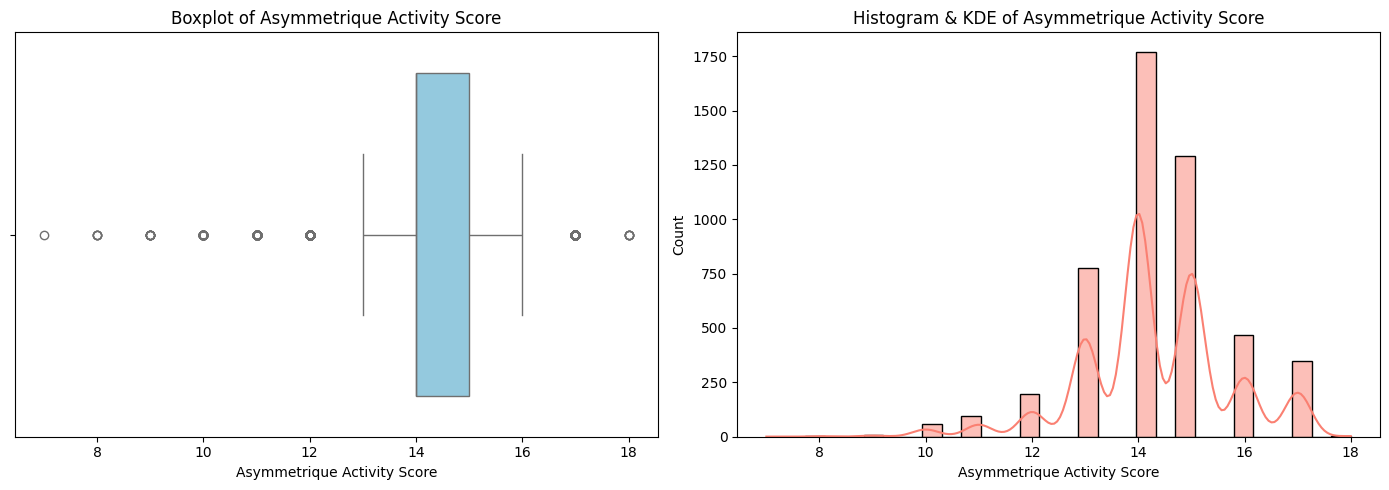

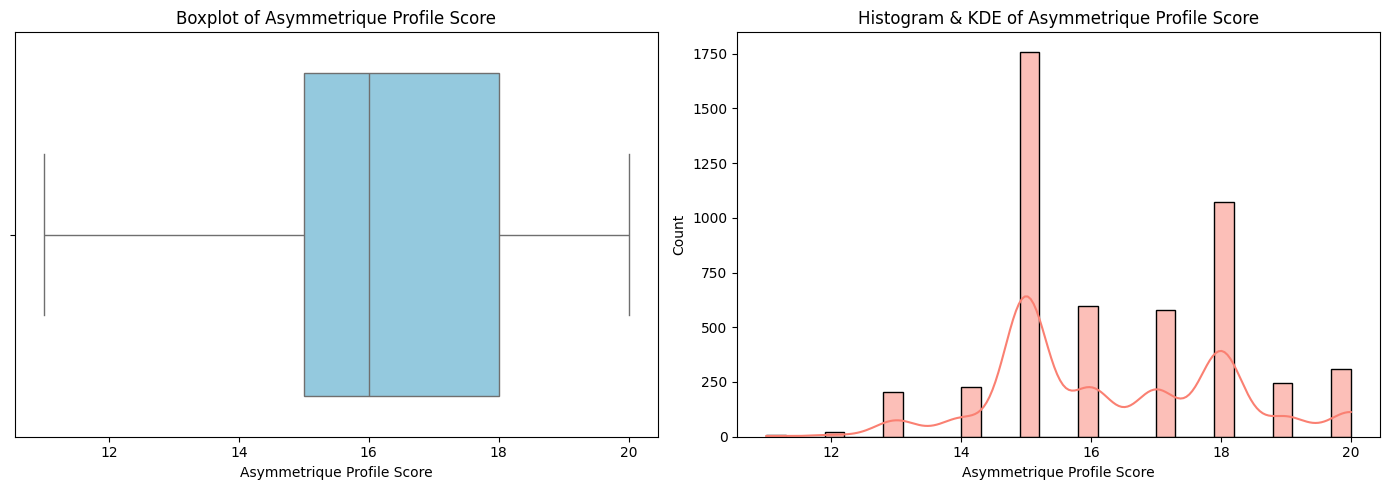

In [17]:
plot_numerical_distributions(df)

In [35]:

def plot_categorical_comparison(df, target_col):
    """
    For each categorical column in the DataFrame (excluding the target column),
    plot a stacked bar chart showing the percentage distribution of the target column
    within each category.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    target_col (str): The name of the target column to compare against (e.g., 'Converted').
    """
    # Select categorical columns, excluding target
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    categorical_cols = [col for col in categorical_cols if col != target_col]
    
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        
        # Compute percentage distribution (normalize by row/category)
        ct = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        
        # Plot as stacked bar chart for percentages
        ct.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
        
        plt.title(f'Percentage Distribution of {col} by {target_col}')
        plt.ylabel('Percentage (%)')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.legend(title=target_col)
        plt.tight_layout()
        plt.show()


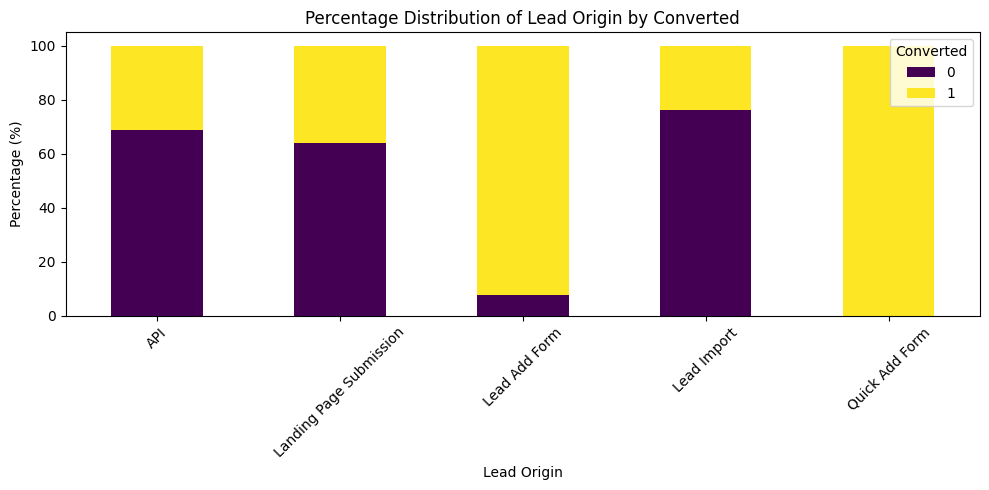

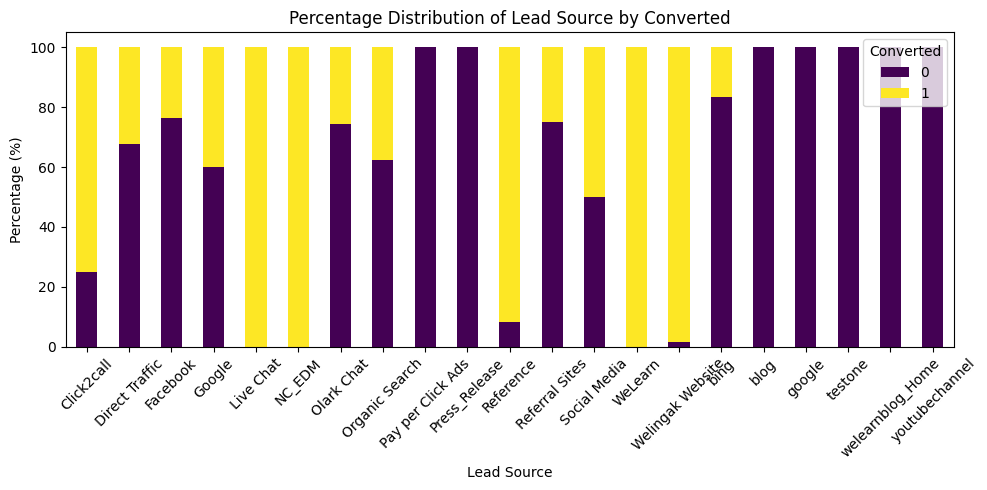

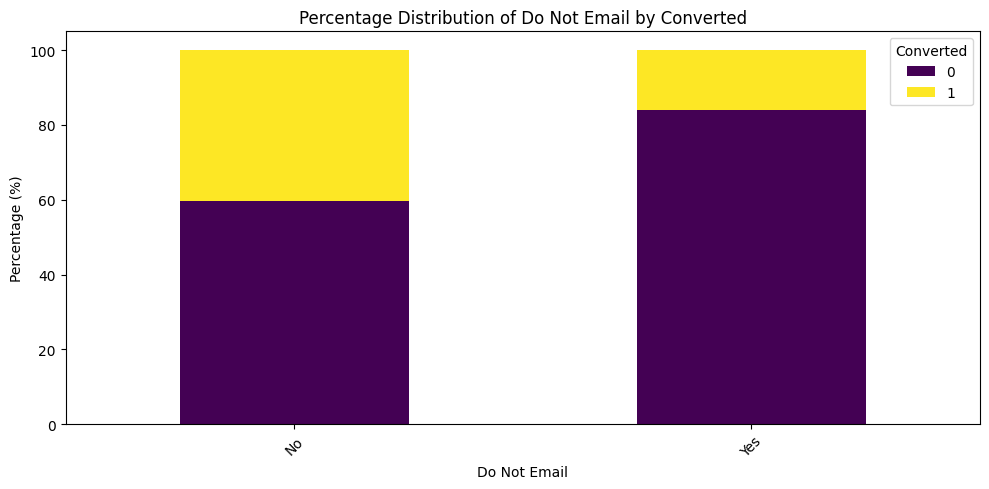

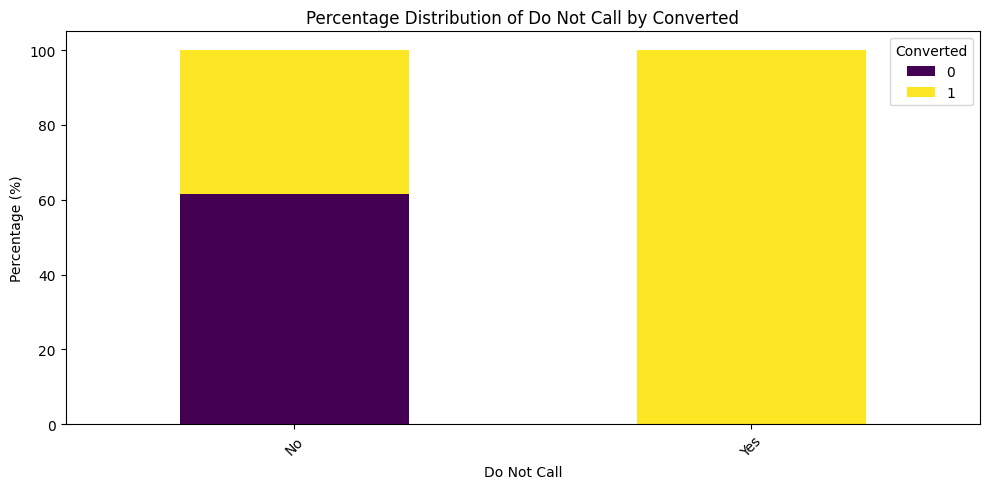

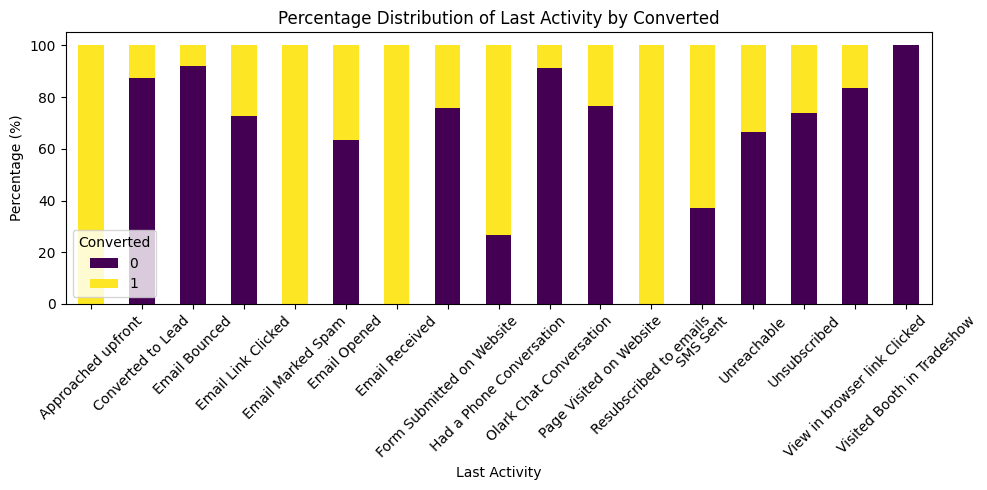

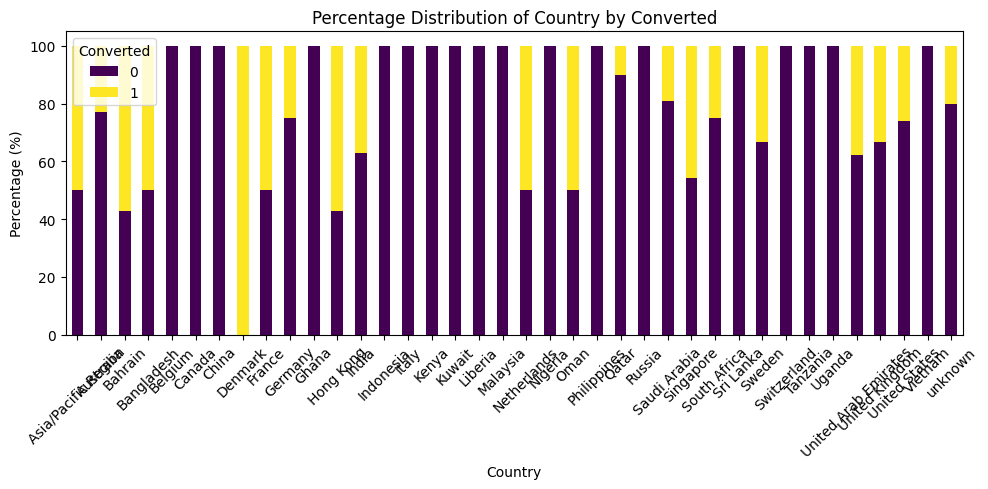

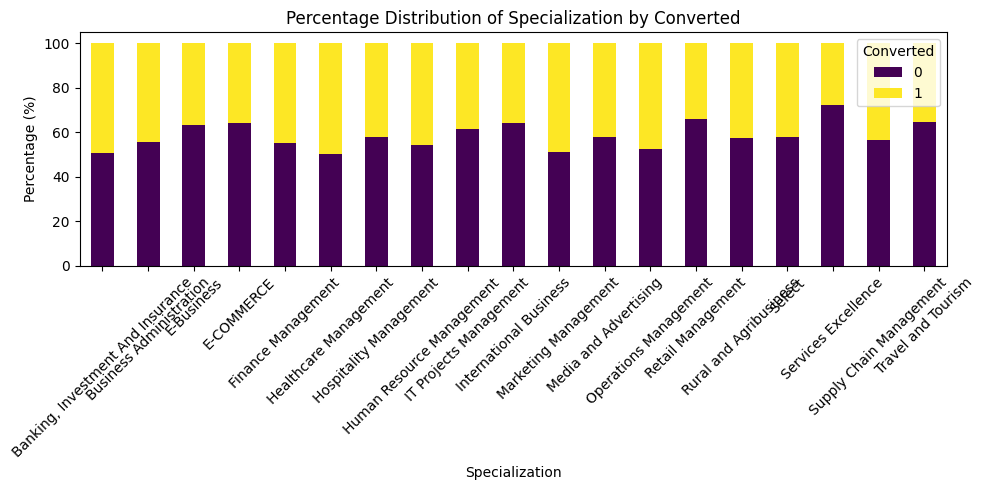

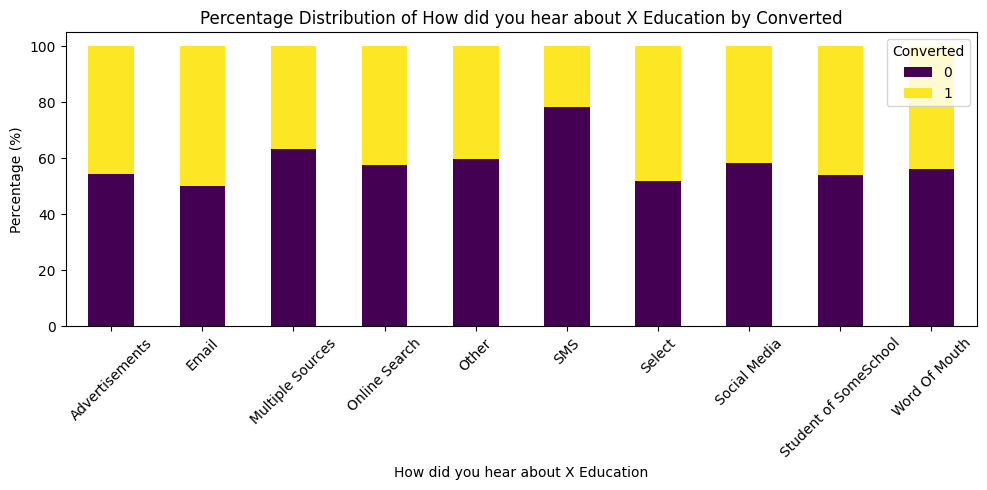

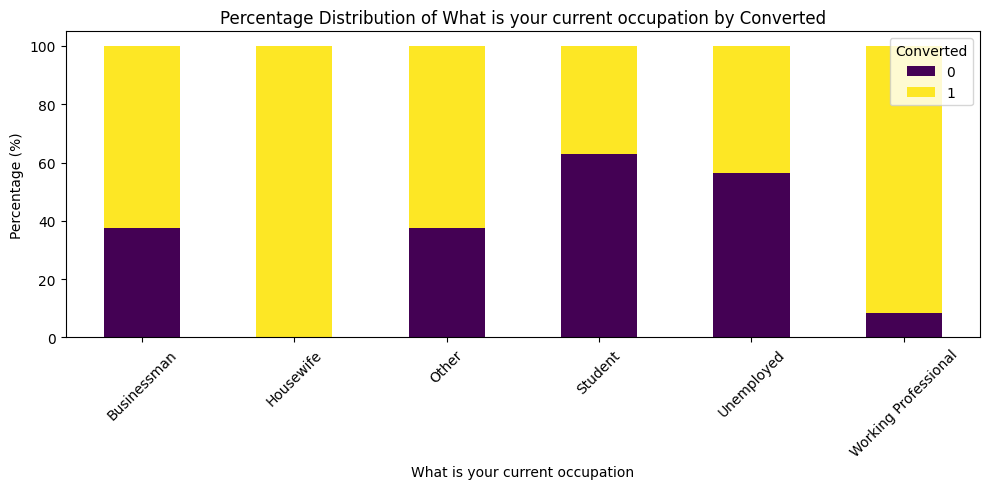

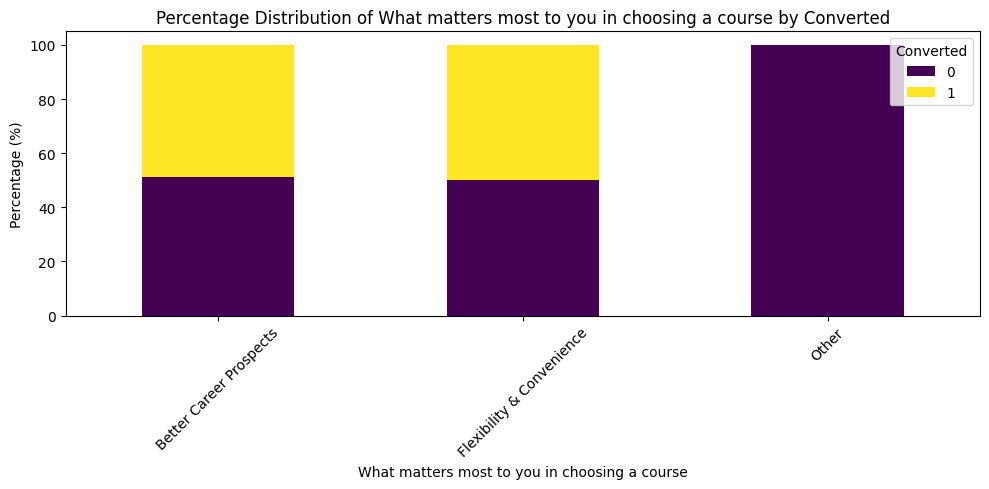

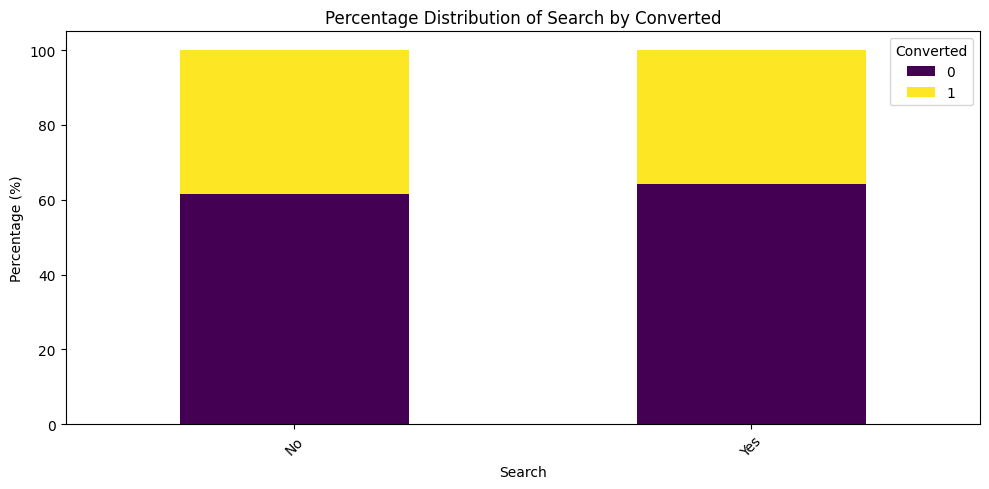

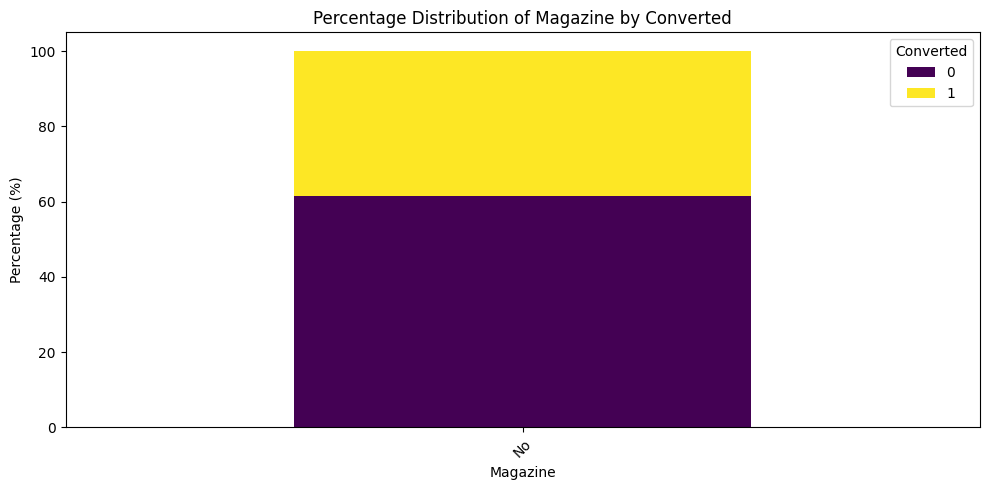

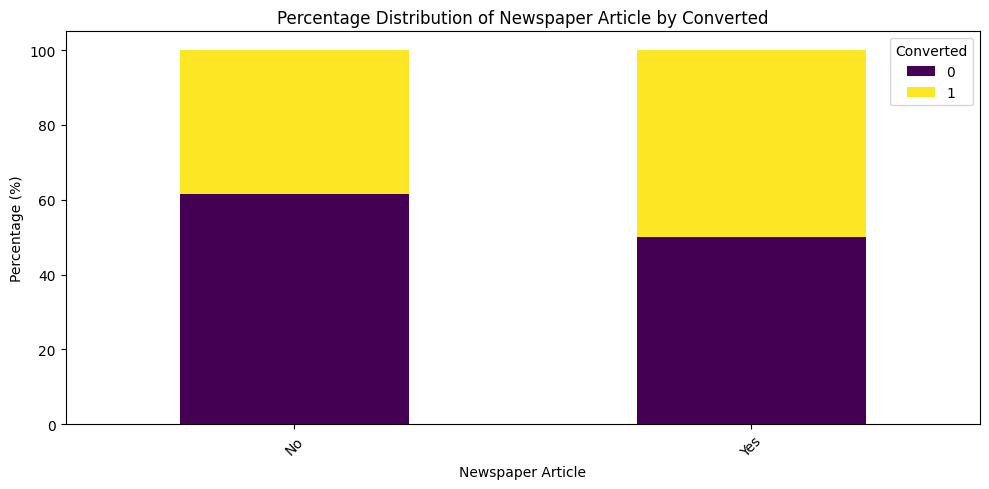

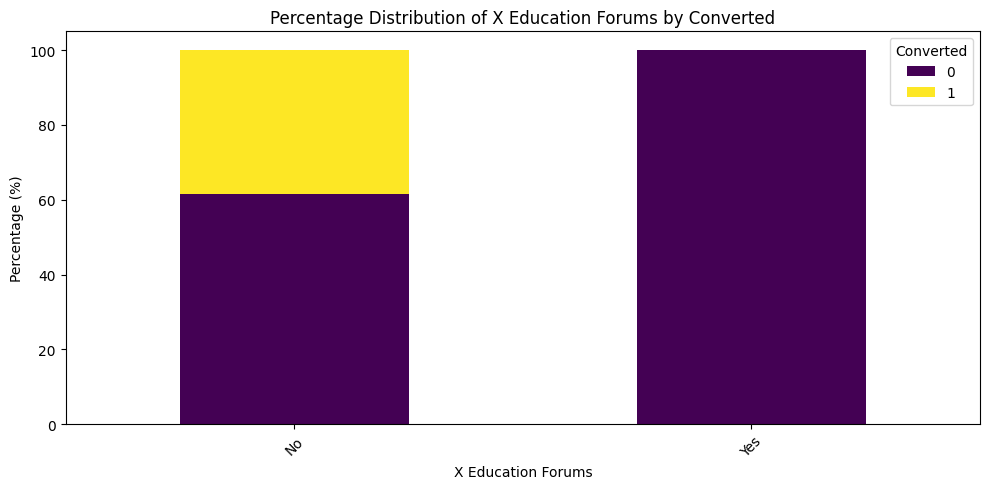

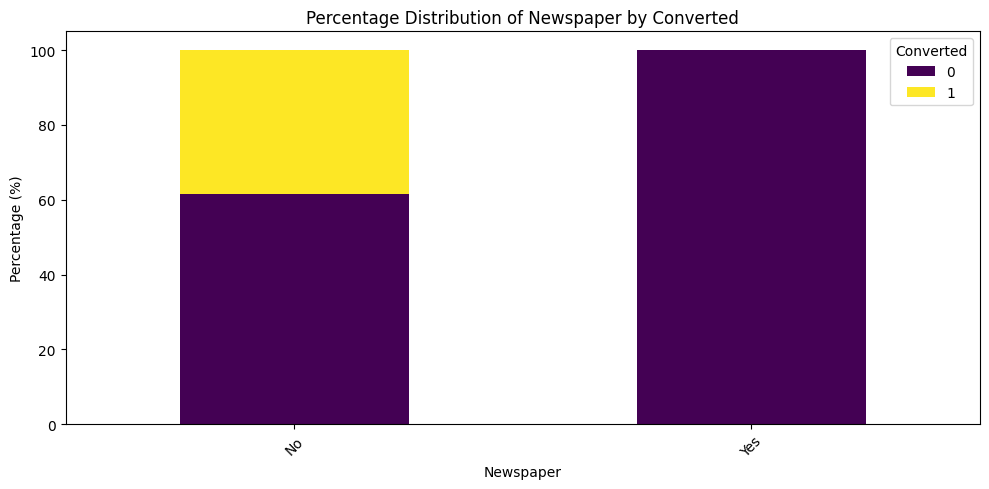

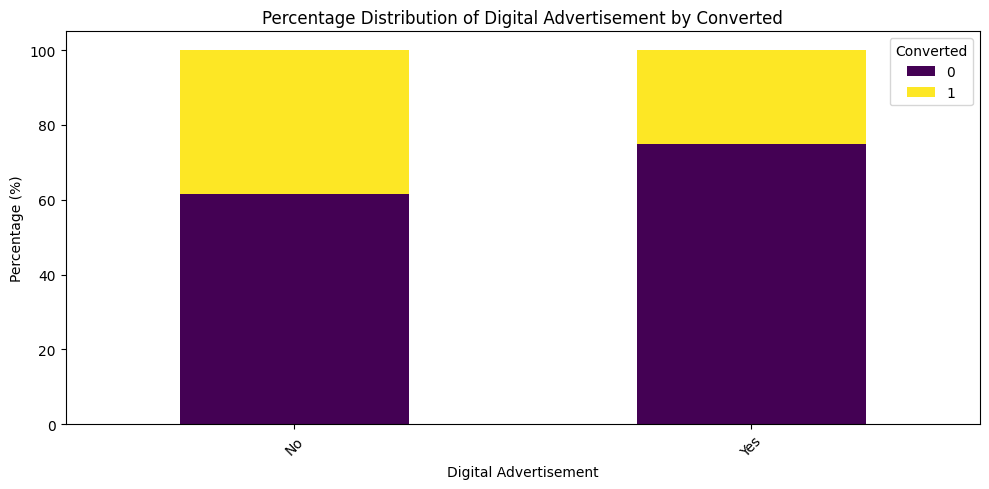

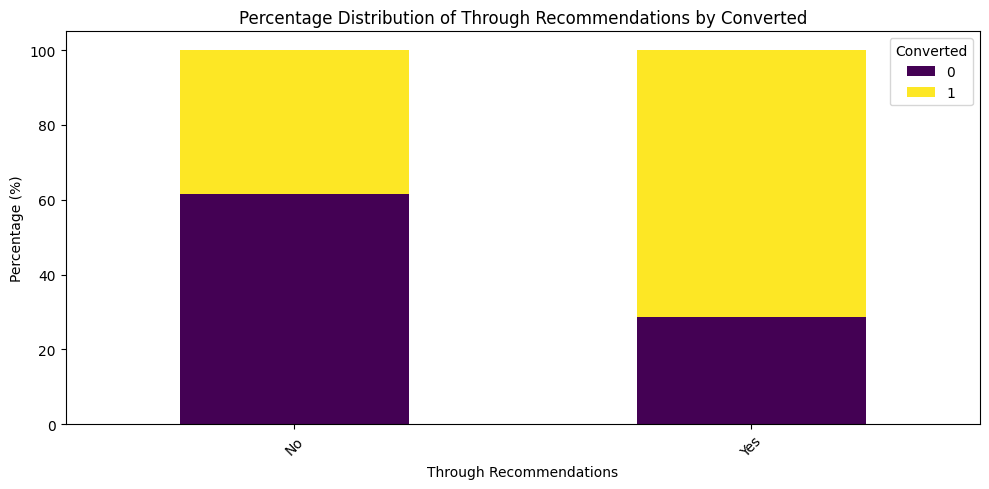

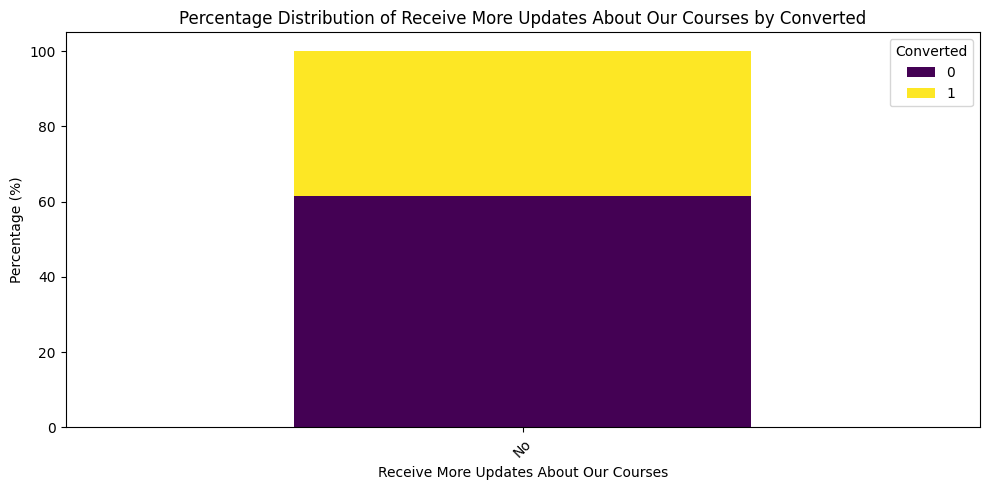

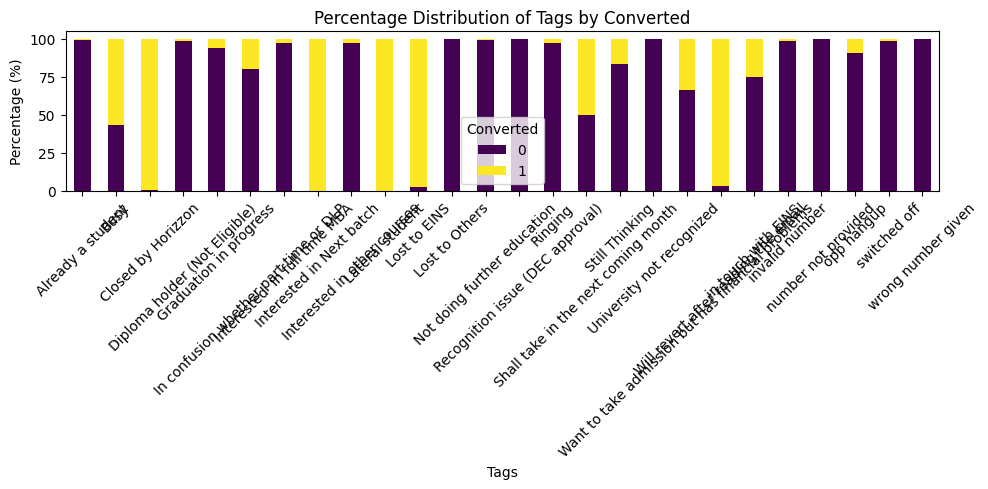

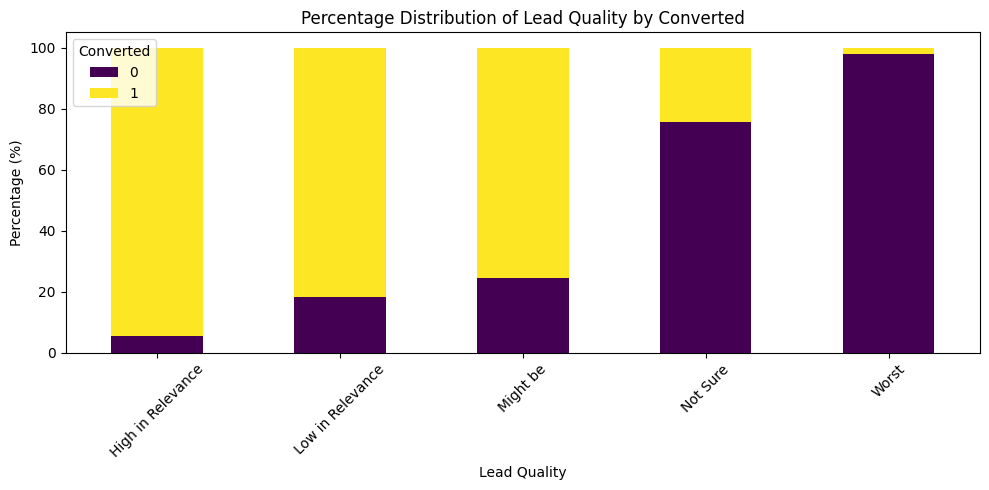

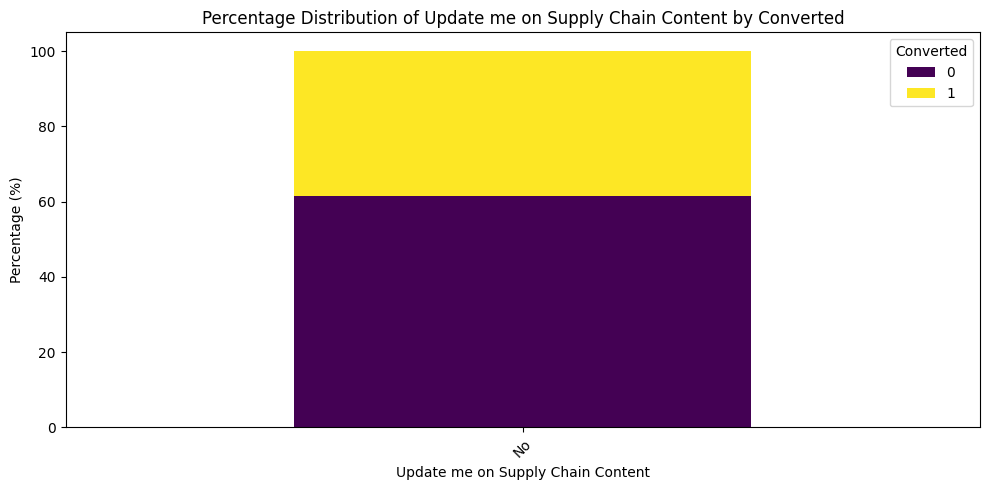

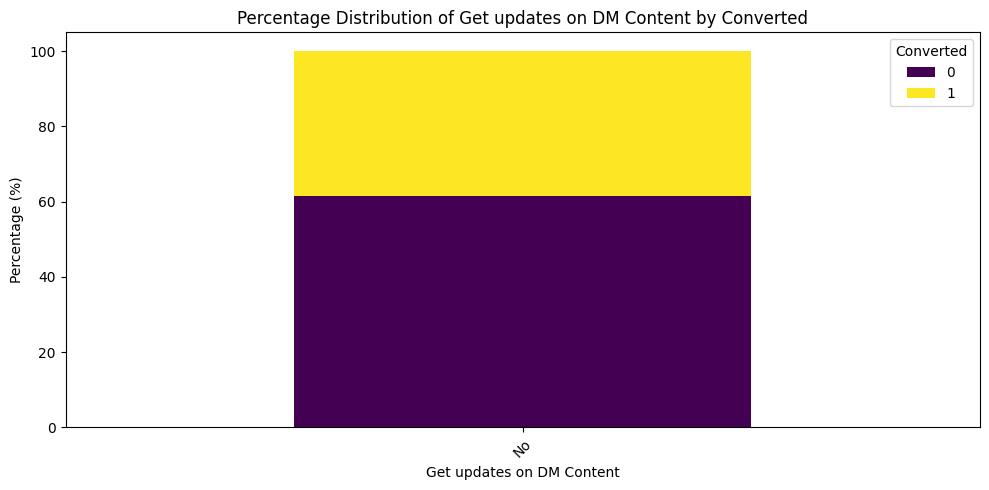

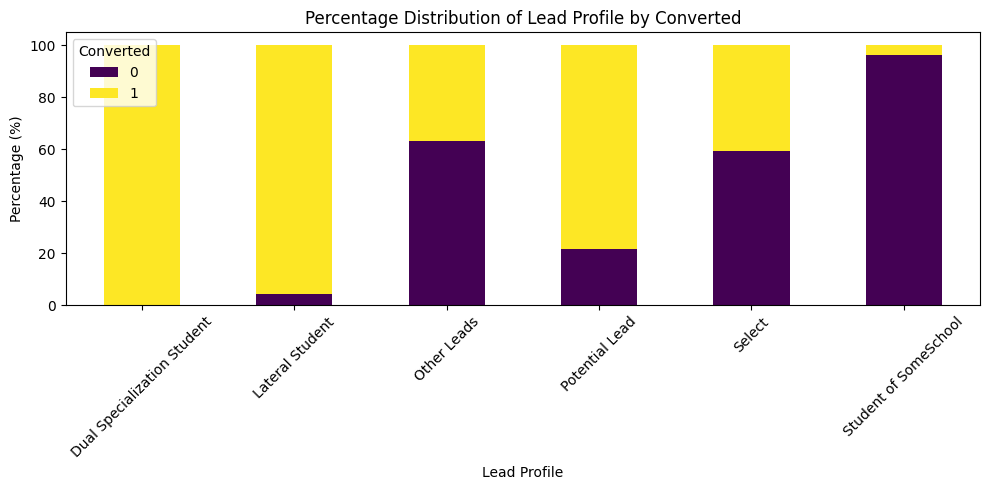

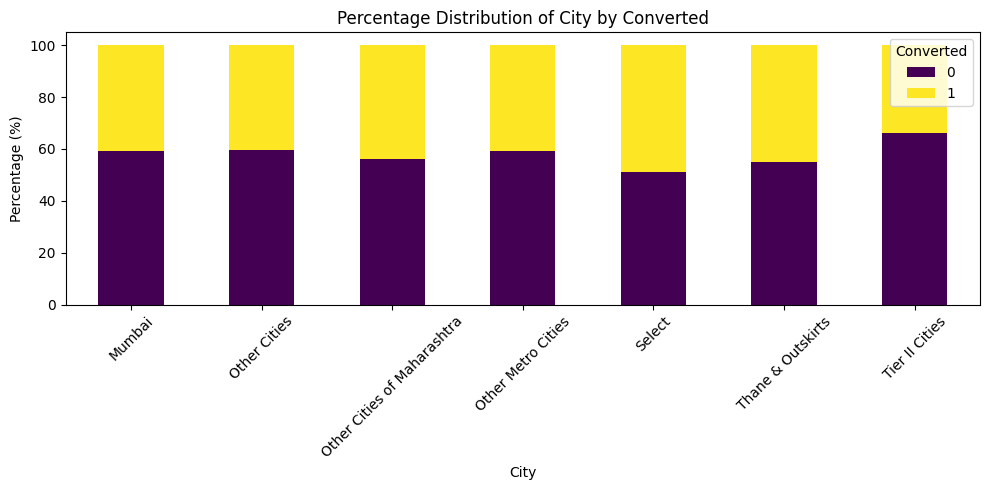

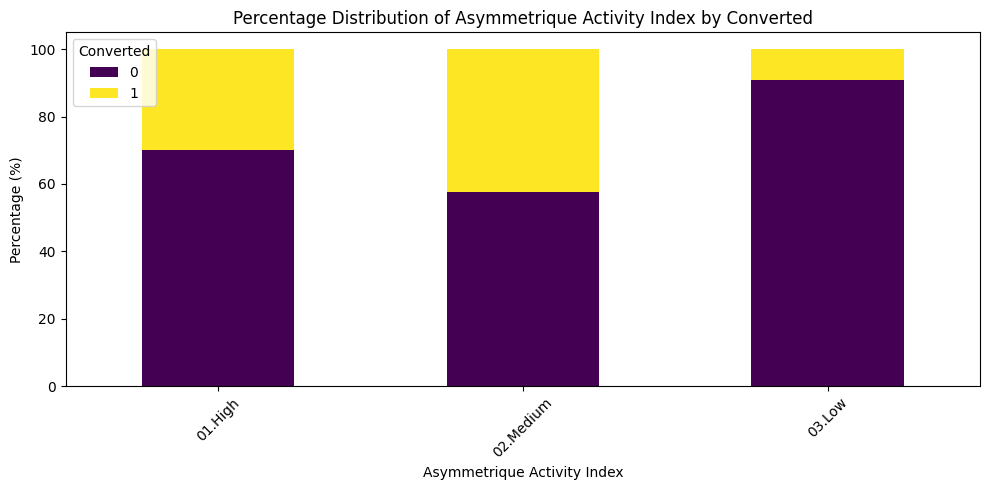

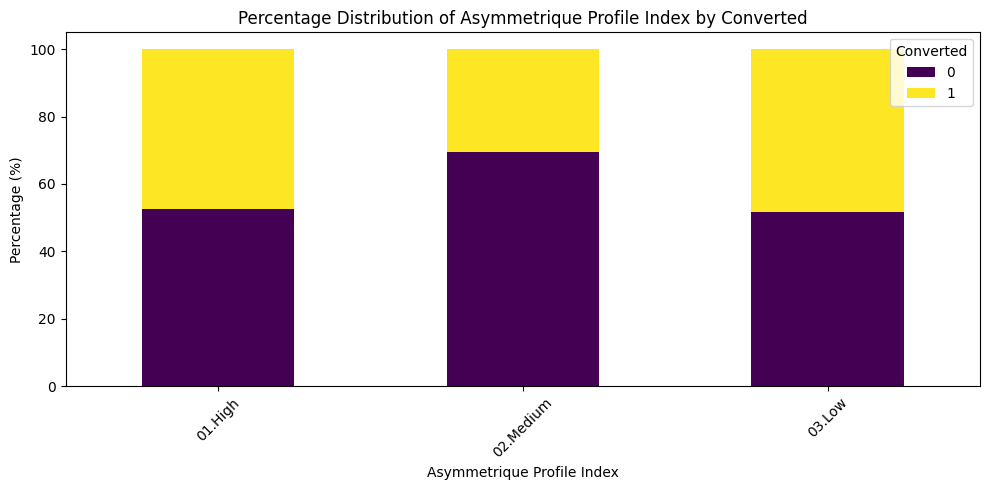

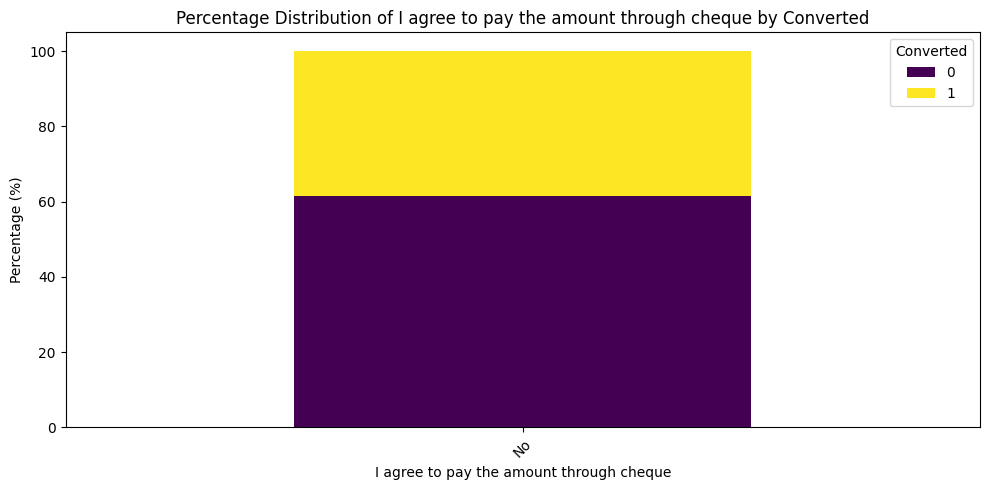

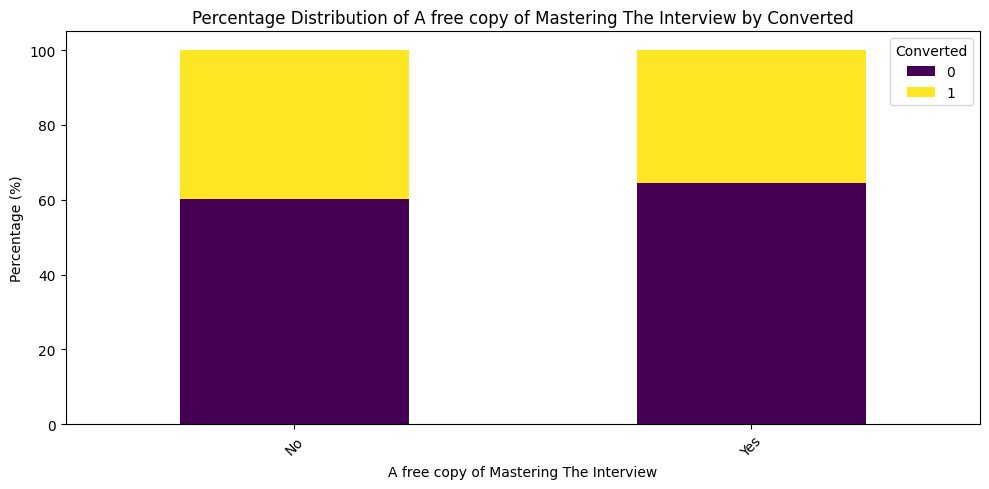

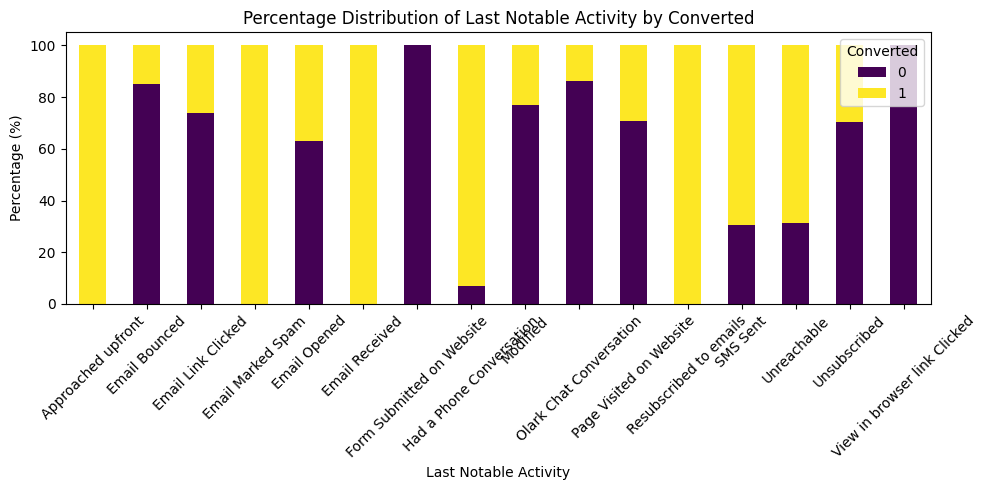

In [36]:
plot_categorical_comparison(df, target_col='Converted')

<p> From this we can see  , The Lead Quality ideally shouldnt be used . It should just be used as a metric to understand the clients. </p>
<p>The last graph is nice , We get to know Most of the Last notable activity has been modified , and those who have modified are majorly not converted.</p>

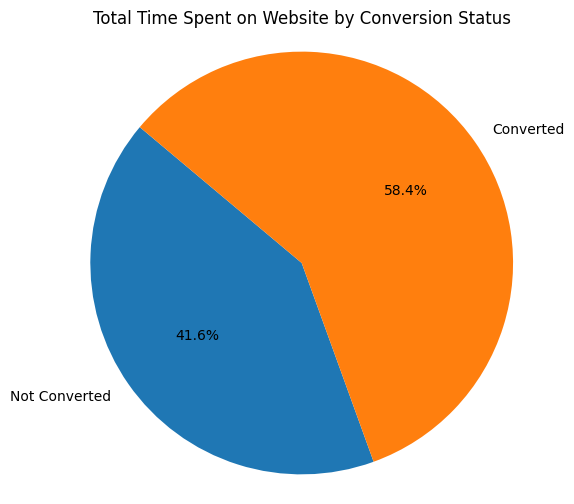

In [20]:
grouped = df.groupby('Converted')['Total Time Spent on Website'].sum()

# Prepare labels and values
labels = ['Not Converted' if i == 0 else 'Converted' for i in grouped.index]
sizes = grouped.values

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Time Spent on Website by Conversion Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


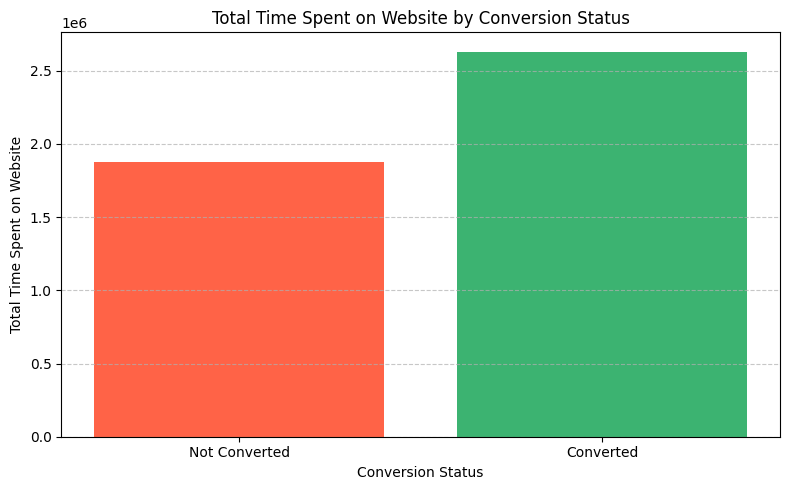

In [21]:
grouped = df.groupby('Converted')['Total Time Spent on Website'].sum()

labels = ['Not Converted' if i == 0 else 'Converted' for i in grouped.index]
values = grouped.values

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['tomato', 'mediumseagreen'])
plt.title('Total Time Spent on Website by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Total Time Spent on Website')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h4>Average of the total times spent for Converted and Non Converted</h4>

In [6]:
df = pd.read_csv("Datasets/Lead Scoring.csv")

In [22]:
df.groupby(["Converted"])["Total Time Spent on Website"].mean()

Converted
0    330.404473
1    738.546757
Name: Total Time Spent on Website, dtype: float64

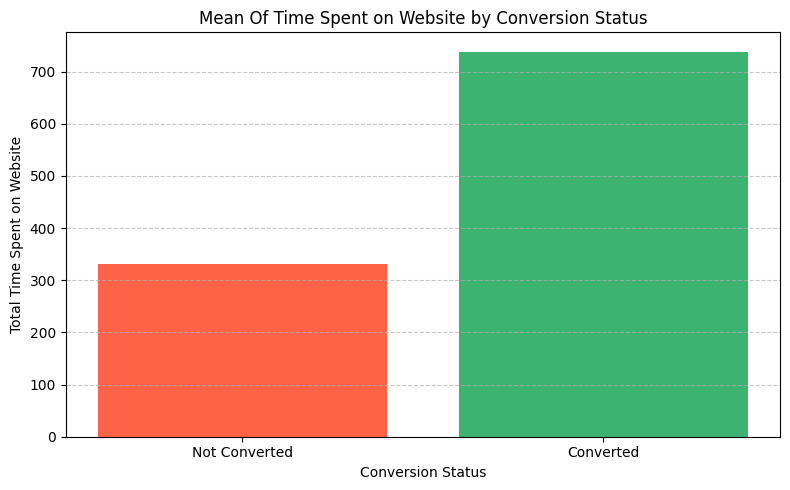

In [8]:
grouped = df.groupby('Converted')['Total Time Spent on Website'].mean()

labels = ['Not Converted' if i == 0 else 'Converted' for i in grouped.index]
values = grouped.values

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['tomato', 'mediumseagreen'])
plt.title('Mean Of Time Spent on Website by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Total Time Spent on Website')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Converted users spend almost 123.52% more time in the website when compared to Non Converted users.

<h4>Correlation Matrix</h4>

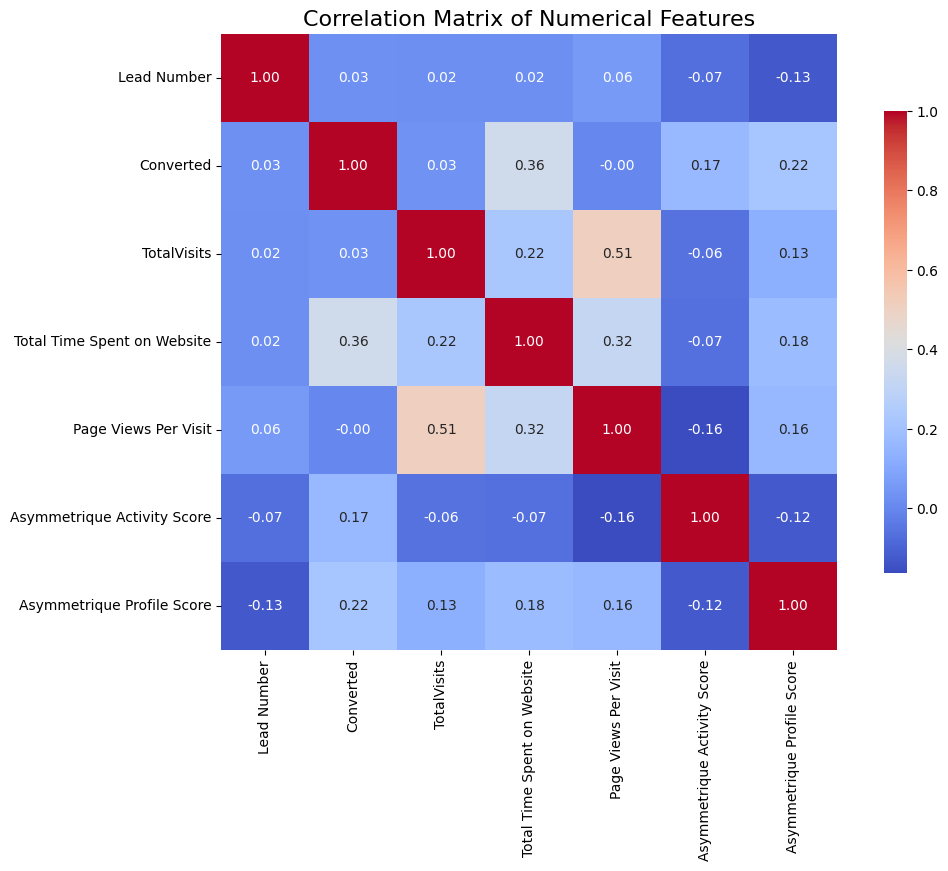

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .75})

# Title
plt.title("Correlation Matrix of Numerical Features", fontsize=16)

# Show plot
plt.show()


In [24]:
def analyze_grouped_means(df, group_col, threshold=50):
    """
    Analyzes numerical columns by computing group-wise means and identifying large differences.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - group_col (str): The name of the column to group by.
    - threshold (float): The minimum percentage difference to consider a value 'vastly different'.

    Returns:
    - grouped_means (pd.DataFrame): Mean values of numerical columns by group.
    - percent_diff (pd.Series): Percentage differences between group 1 and group 0.
    - vastly_different (pd.Series): Subset of percent_diff with absolute value > threshold.
    """
    # Group by specified column and compute mean of numerical columns
    grouped_means = df.groupby(group_col).mean(numeric_only=True)

    # Ensure we have exactly two groups to compare
    if grouped_means.shape[0] != 2:
        raise ValueError(f"The group column '{group_col}' must have exactly 2 unique values for comparison.")

    # Compute absolute and percentage differences
    diff = grouped_means.iloc[1] - grouped_means.iloc[0]
    percent_diff = (diff / grouped_means.iloc[0]) * 100

    # Filter for vastly different columns
    vastly_different = percent_diff[percent_diff.abs() > threshold]

    return grouped_means, percent_diff, vastly_different



In [25]:
analyze_grouped_means(df , "Converted" , 50)

(           TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
 Converted                                                                   
 0             3.329670                   330.404473              2.368453   
 1             3.633632                   738.546757              2.353638   
 
            Asymmetrique Activity Score  Asymmetrique Profile Score  
 Converted                                                           
 0                            14.123956                   16.035003  
 1                            14.603774                   16.850629  ,
 TotalVisits                      9.128879
 Total Time Spent on Website    123.528075
 Page Views Per Visit            -0.625514
 Asymmetrique Activity Score      3.397187
 Asymmetrique Profile Score       5.086533
 dtype: float64,
 Total Time Spent on Website    123.528075
 dtype: float64)